# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

np.random.seed(42)

## Data Loading and Initial Inspection

In [2]:
file_path = 'Tomato_Viavi_Brix_model_pulp.csv'
data = pd.read_csv(file_path)

# Basic info
print(f"Dataset shape: {data.shape}")
print(f"\nNumber of data points: {data.shape[0]}")
print(f"Number of features: {data.shape[1]}")

data.head()

Dataset shape: (432, 137)

Number of data points: 432
Number of features: 137


,Instrument Serial Number,Temperature,Notes,Timestamp,Integration Time,SAMPLE NO,SAMPLE NO.1,plant,wetlab ID,sample type,...,1620.451,1626.645,1632.839,1639.034,1645.228,1651.423,1657.617,1663.811,1670.006,1676.2
0,M1-1000464,31.8750,NaN,21-05-2024 07:45,9.1,201-P1-P-1.sam,201,P1,201-P1,Pulp,...,1.265409,1.263108,1.260378,1.258111,1.256344,1.254230,1.252375,1.250840,1.250441,1.249564
1,M1-1000464,31.8125,NaN,21-05-2024 07:46,9.1,201-P1-P-2.sam,201,P1,201-P1,Pulp,...,1.266164,1.263661,1.261331,1.259037,1.257239,1.254757,1.253131,1.251883,1.250865,1.250590
2,M1-1000464,31.8750,NaN,21-05-2024 07:46,9.1,201-P1-P-3.sam,201,P1,201-P1,Pulp,...,1.273848,1.271288,1.269282,1.266799,1.265270,1.263347,1.261552,1.260027,1.259645,1.259162
3,M1-1000464,31.8125,NaN,21-05-2024 07:46,9.1,201-P1-P-4.sam,201,P1,201-P1,Pulp,...,1.281024,1.278791,1.276968,1.274840,1.273310,1.271171,1.269791,1.268718,1.267740,1.267529
4,M1-1000464,31.8750,NaN,21-05-2024 07:46,9.1,201-P1-P-5.sam,201,P1,201-P1,Pulp,...,1.283274,1.281024,1.279173,1.277069,1.275780,1.273907,1.272688,1.271445,1.270943,1.270470


In [3]:
columns = data.columns.tolist()
print(f"Columns' names: {columns}")

Columns' names: ['Instrument Serial Number', 'Temperature', 'Notes', 'Timestamp', 'Integration Time', 'SAMPLE NO', 'SAMPLE NO.1', 'plant', 'wetlab ID', 'sample type', 'Lab', 'Brix', '908.1', '914.294', '920.489', '926.683', '932.877', '939.072', '945.266', '951.46', '957.655', '963.849', '970.044', '976.238', '982.432', '988.627', '994.821', '1001.015', '1007.21', '1013.404', '1019.598', '1025.793', '1031.987', '1038.181', '1044.376', '1050.57', '1056.764', '1062.959', '1069.153', '1075.348', '1081.542', '1087.736', '1093.931', '1100.125', '1106.319', '1112.514', '1118.708', '1124.902', '1131.097', '1137.291', '1143.485', '1149.68', '1155.874', '1162.069', '1168.263', '1174.457', '1180.652', '1186.846', '1193.04', '1199.235', '1205.429', '1211.623', '1217.818', '1224.012', '1230.206', '1236.401', '1242.595', '1248.789', '1254.984', '1261.178', '1267.373', '1273.567', '1279.761', '1285.956', '1292.15', '1298.344', '1304.539', '1310.733', '1316.927', '1323.122', '1329.316', '1335.51', '1

In [4]:
# Display dataset column information
print("Dataset Column Information:")
print("==========================")

# Get all non-wavelength columns
non_wavelength_cols = [col for col in data.columns if not col.replace('.', '').isdigit()]

# Display data types for these columns
col_info = data[non_wavelength_cols].dtypes

# Print column info with description
for col, dtype in col_info.items():
    # Get additional statistics for numeric columns
    if pd.api.types.is_numeric_dtype(dtype):
        stats = data[col].describe()
        print(f"{col}: {dtype} (Min: {stats['min']:.2f}, Max: {stats['max']:.2f}, Mean: {stats['mean']:.2f})")
    else:
        unique_count = data[col].nunique()
        print(f"{col}: {dtype} (Unique values: {unique_count})")

    # Print missing values if any
    missing = data[col].isna().sum()
    if missing > 0:
        print(f"   - Missing values: {missing} ({missing/len(data)*100:.2f}%)")

Dataset Column Information:
Instrument Serial Number: object (Unique values: 1)
Temperature: float64 (Min: 24.12, Max: 32.50, Mean: 27.70)
Notes: object (Unique values: 1)
   - Missing values: 429 (99.31%)
Timestamp: object (Unique values: 131)
Integration Time: float64 (Min: 9.10, Max: 9.10, Mean: 9.10)
SAMPLE NO: object (Unique values: 432)
SAMPLE NO.1: object (Unique values: 28)
plant: object (Unique values: 15)
wetlab ID: object (Unique values: 84)
sample type: object (Unique values: 1)
Lab: object (Unique values: 1)
Brix: float64 (Min: 3.30, Max: 6.07, Mean: 4.54)


## Extracting Spectral Data and Target Variable

In [5]:
# Identify spectral wavelength columns
wavelength_cols = [col for col in data.columns if col.replace('.', '').isdigit()]
print(f"Number of spectral wavelengths: {len(wavelength_cols)}")
print(f"Wavelength range: {wavelength_cols[0]} - {wavelength_cols[-1]} nm")

# Extract spectral data and convert wavelengths to float
X = data[wavelength_cols].values
wavelengths = np.array([float(col) for col in wavelength_cols])

y = data['Brix'].values

brix_stats = data['Brix'].describe()
print("\nBrix value statistics:")
print(brix_stats)

Number of spectral wavelengths: 125
Wavelength range: 908.1 - 1676.2 nm

Brix value statistics:
count    432.000000
mean       4.542515
std        0.586262
min        3.300000
25%        4.166667
50%        4.500000
75%        4.866667
max        6.066667
Name: Brix, dtype: float64


## Exploratory Visualizations

### 1. NIR Spectra Visualization

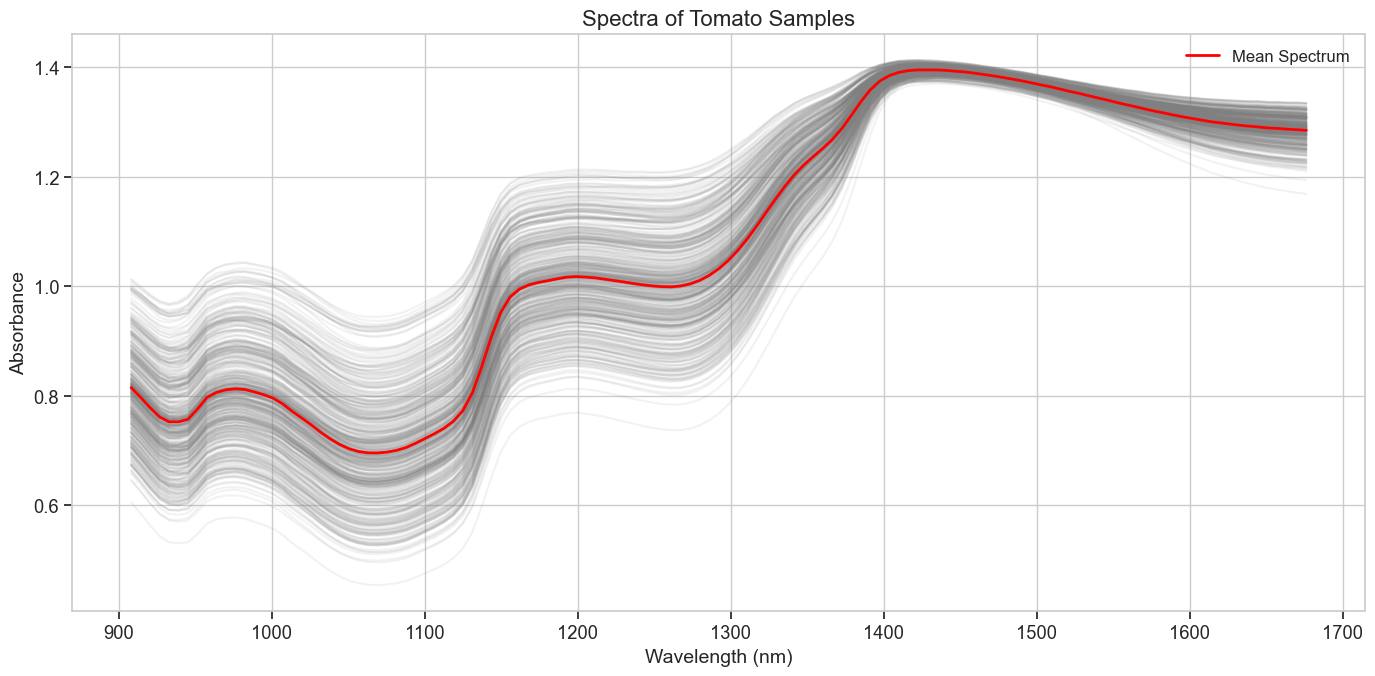

In [6]:
plt.figure(figsize=(14, 7))

for i in range(X.shape[0]):
    plt.plot(wavelengths, X[i], alpha=0.1, color='gray')
    
mean_spectrum = X.mean(axis=0)
plt.plot(wavelengths, mean_spectrum, color='red', linewidth=2, label='Mean Spectrum')

plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('Absorbance', fontsize=14)
plt.title('Spectra of Tomato Samples', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

**Insights from NIR Spectra Visualization:**
- There's a notable peak in absorbance around 1400-1450 nm
- The variation between samples is more pronounced in certain regions, which may relate to differences in sugar content

### 2. Brix Value Distribution

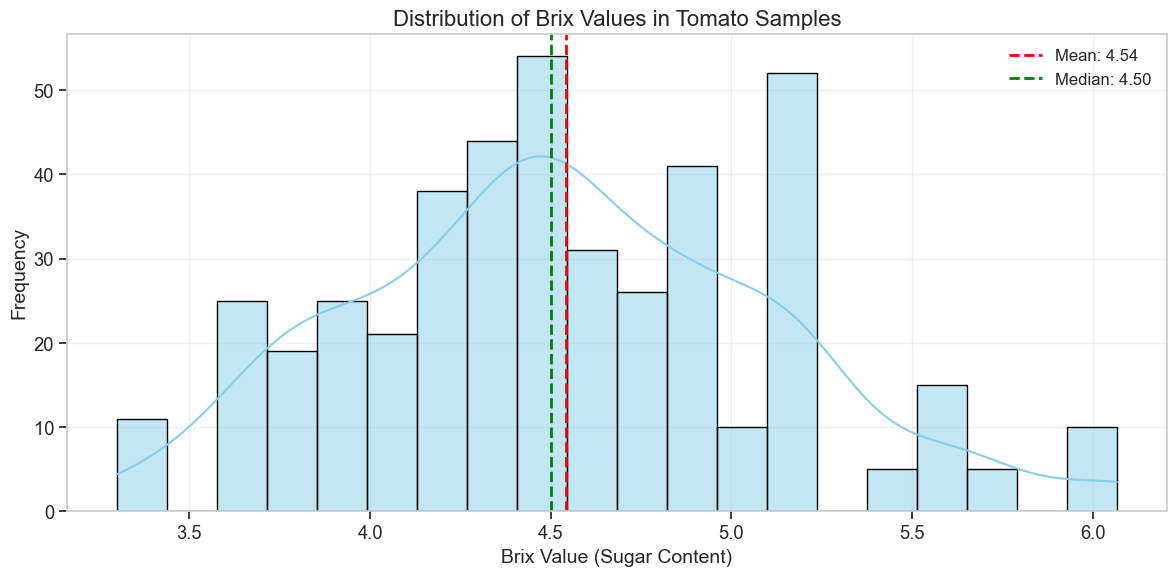

In [7]:
plt.figure(figsize=(12, 6))

# Create histogram with KDE (helps understand if the distribution is normal, skewed, or has multiple modes)
sns.histplot(y, kde=True, bins=20, color='skyblue')

plt.axvline(np.mean(y), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(y):.2f}')
plt.axvline(np.median(y), color='green', linestyle='dashed', linewidth=2, label=f'Median: {np.median(y):.2f}')

plt.xlabel('Brix Value (Sugar Content)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Brix Values in Tomato Samples', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Insights from Brix Distribution:**
- I can observe that the distribution is close to normal

### 3. Spectral Correlation with Brix Values

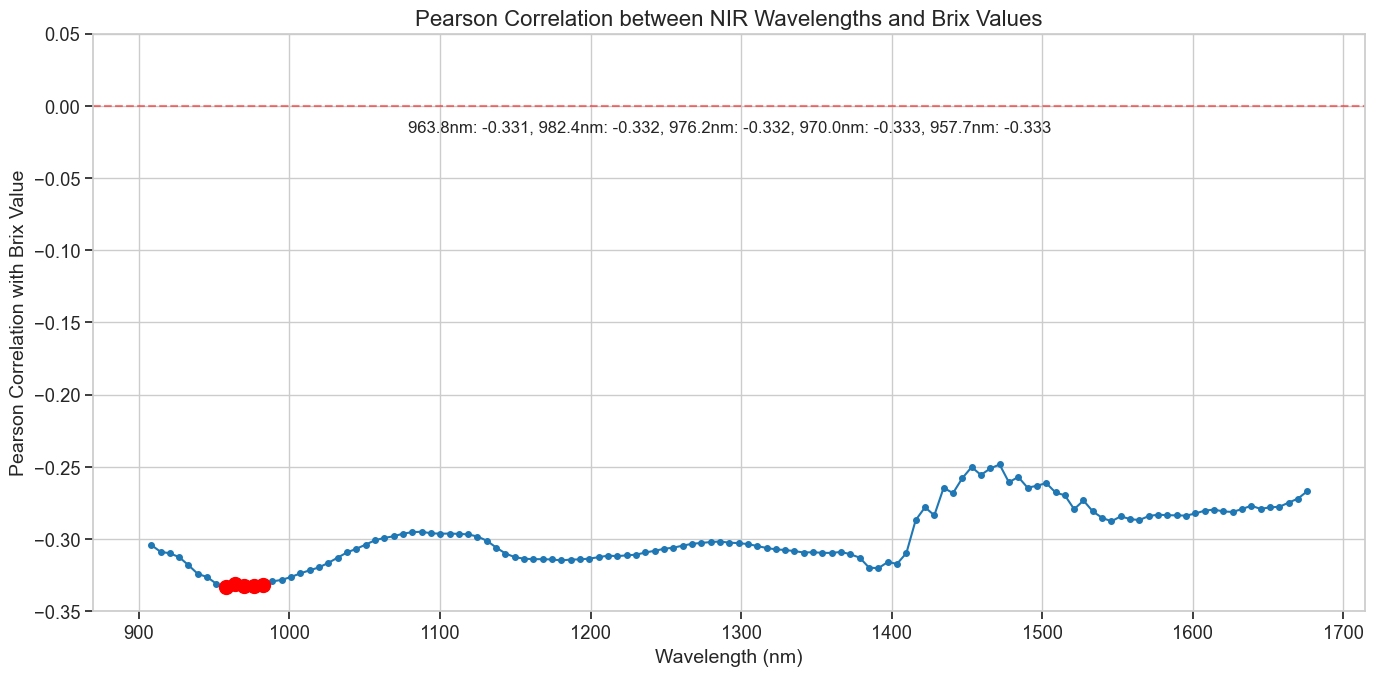

In [8]:
# Calculate Pearson correlation for each wavelength
from scipy.stats import pearsonr
correlations = [pearsonr(X[:, i], y)[0] for i in range(X.shape[1])]

plt.figure(figsize=(14, 7))
plt.plot(wavelengths, correlations, 'o-', markersize=4)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)

# Identify wavelengths with strongest absolute correlation
abs_corr = np.abs(correlations)
top_indices = np.argsort(abs_corr)[-5:]  # Top 5 wavelengths

# Highlight top correlations with red points
for idx in top_indices:
    plt.plot(wavelengths[idx], correlations[idx], 'ro', markersize=10)

# Create annotation text for top wavelengths
annotation_text = ""
for i, idx in enumerate(top_indices):
    if i > 0:
        annotation_text += ", "
    annotation_text += f"{wavelengths[idx]:.1f}nm: {correlations[idx]:.3f}"

# Place the text below the zero line at the top of the chart
plt.annotate(annotation_text,
             xy=(np.mean(wavelengths), -0.01),
             xytext=(0, 0),
             textcoords='offset points',
             ha='center', va='top',
             fontsize=12)

plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('Pearson Correlation with Brix Value', fontsize=14)
plt.title('Pearson Correlation between NIR Wavelengths and Brix Values', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.ylim(-0.35, 0.05)
plt.show()

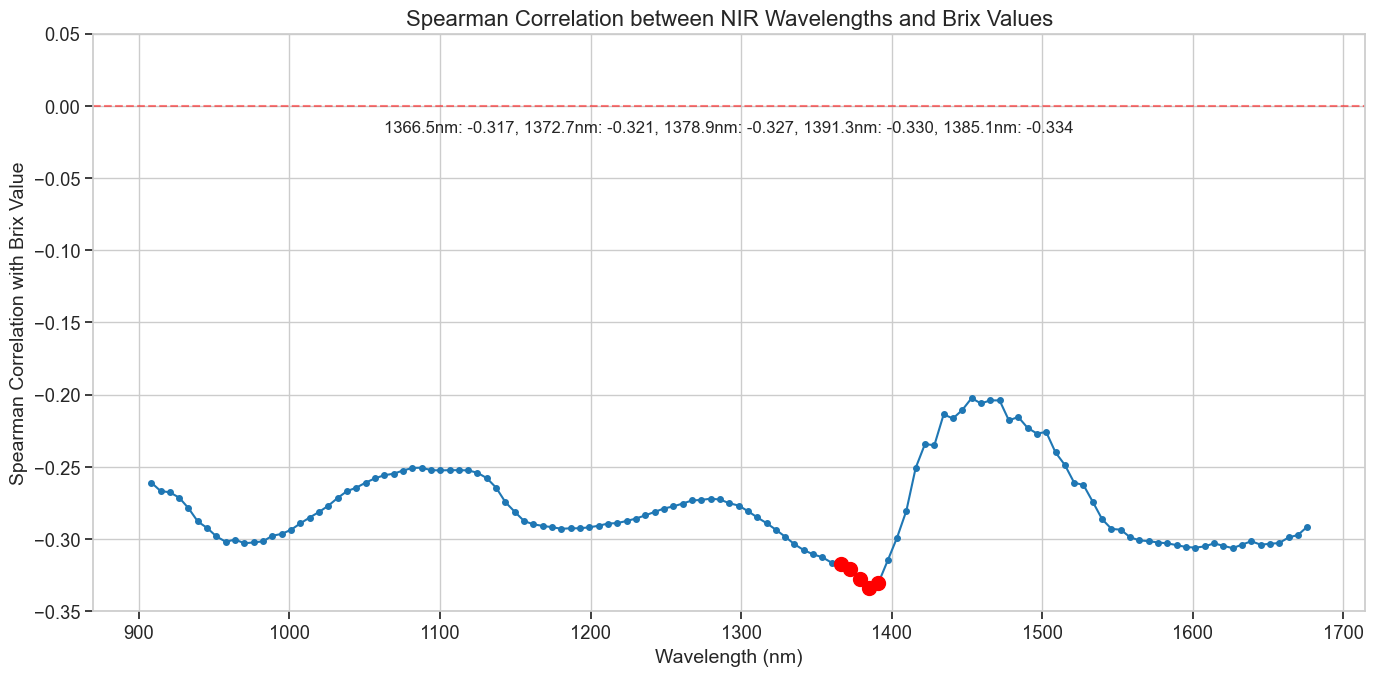

In [9]:
# Calculate Spearman correlation for each wavelength
from scipy.stats import spearmanr
spearman_correlations = [spearmanr(X[:, i], y)[0] for i in range(X.shape[1])]

plt.figure(figsize=(14, 7))
plt.plot(wavelengths, spearman_correlations, 'o-', markersize=4)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)

# Identify wavelengths with strongest absolute correlation
abs_corr = np.abs(spearman_correlations)
top_indices = np.argsort(abs_corr)[-5:]

# Highlight top correlations with red points
for idx in top_indices:
    plt.plot(wavelengths[idx], spearman_correlations[idx], 'ro', markersize=10)

# Create annotation text for top wavelengths
annotation_text = ""
for i, idx in enumerate(top_indices):
    if i > 0:
        annotation_text += ", "
    annotation_text += f"{wavelengths[idx]:.1f}nm: {spearman_correlations[idx]:.3f}"

# Place the text below the zero line at the top of the chart
plt.annotate(annotation_text,
             xy=(np.mean(wavelengths), -0.01),
             xytext=(0, 0),
             textcoords='offset points',
             ha='center', va='top',
             fontsize=12)

plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('Spearman Correlation with Brix Value', fontsize=14)
plt.title('Spearman Correlation between NIR Wavelengths and Brix Values', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.ylim(-0.35, 0.05)
plt.show()

**Insights from Correlation Analysis**

##### 1. Different informative spectral regions:
- *Pearson correlation* identified wavelengths around 957-982 nm as most significant (values -0.331 to -0.333)
- *Spearman correlation* highlighted wavelengths in the 1366-1391 nm range (values -0.317 to -0.334)

##### 2. Correlation strength:
Both methods show moderate negative correlations of similar magnitude between spectral absorbance and Brix values.

##### 3. Relationship nature:
The difference in optimal wavelength regions suggests that the relationship between NIR absorbance and Brix values is complex:
- Near 970 nm (Pearson): More linear relationship
- Near 1380 nm (Spearman): More monotonic but potentially non-linear relationship

##### 4. Implications for modeling:
1. Feature selection should consider both wavelength regions
2. Non-linear modeling approaches may be appropriate for this prediction task

### 4. Sample Grouping Exploration

<Figure size 1400x700 with 0 Axes>

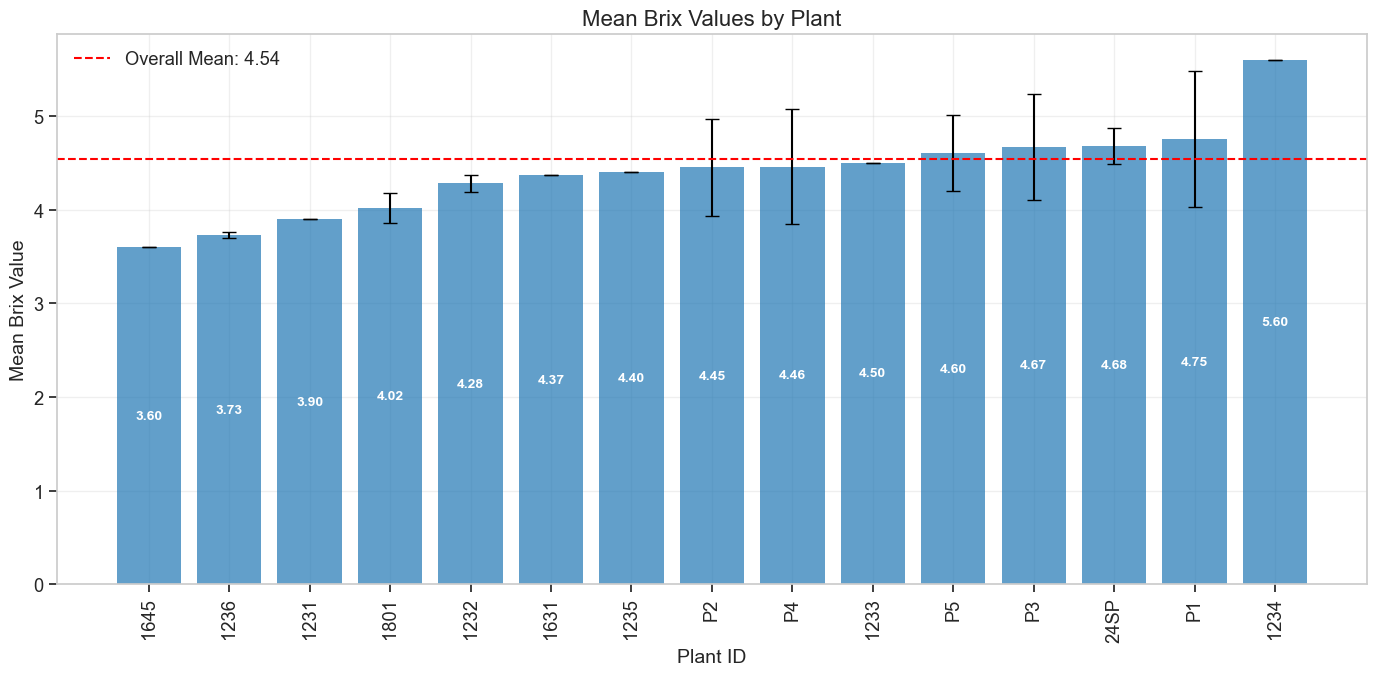

In [10]:
if 'plant' in data.columns:
    plt.figure(figsize=(14, 7))
    
    # Group by plant and calculate mean Brix
    plant_brix = data.groupby('plant')['Brix'].agg(['mean', 'count', 'std'])
    plant_brix = plant_brix.sort_values('mean')
    
    plant_brix_filtered = plant_brix[plant_brix['count'] >= 3]
    
    plt.figure(figsize=(14, 7))
    bars = plt.bar(plant_brix_filtered.index, plant_brix_filtered['mean'], 
                   yerr=plant_brix_filtered['std'], capsize=5, alpha=0.7)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height/2,
             f'{height:.2f}', ha='center', va='center',
             fontsize=10, color='white',
             fontweight='bold')

    plt.axhline(y=np.mean(y), color='red', linestyle='--', label=f'Overall Mean: {np.mean(y):.2f}')
    plt.xlabel('Plant ID', fontsize=14)
    plt.ylabel('Mean Brix Value', fontsize=14)
    plt.title('Mean Brix Values by Plant', fontsize=16)
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Error bars represent standard deviation, showing the variability within each plant

**Insights from Sample Grouping:**
- Clear plant variability: Brix values range widely from 3.6 to 5.5 across different plants
- Variable consistency: Some plants show stable Brix values while others have high internal variability
- Modeling implications:
    - Consider plant ID as a feature
    - Group samples by plant during cross-validation
    - Potentially use sample weighting for inconsistent plants

### 5. Spectral Variation Analysis

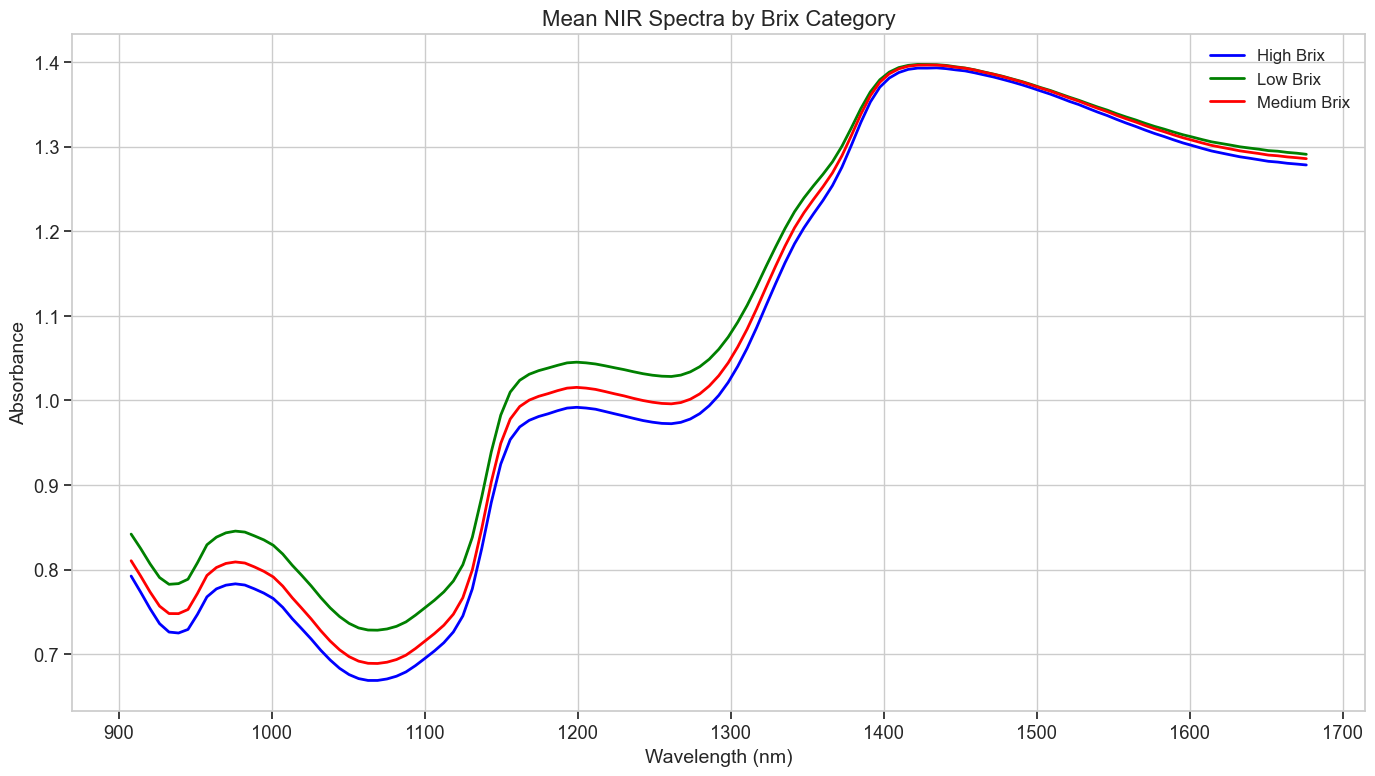

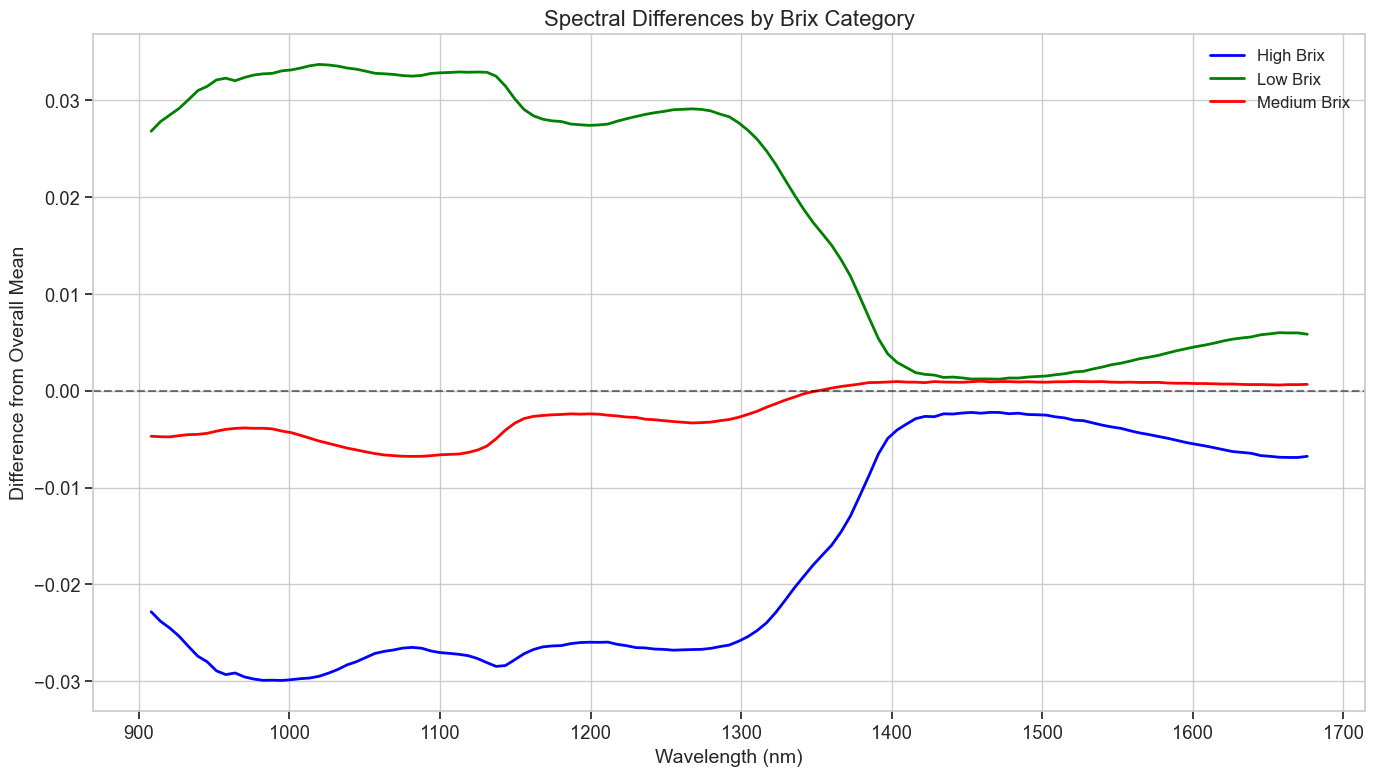

In [11]:
# Brix categories for visualization
brix_bins = pd.qcut(y, q=3, labels=['Low', 'Medium', 'High'])
brix_categories = np.array(brix_bins)

plt.figure(figsize=(14, 8))

unique_categories = np.unique(brix_categories)
colors = ['blue', 'green', 'red']  # for Low, Medium, High
color_map = {cat: col for cat, col in zip(unique_categories, colors)}

# Plot mean spectrum for each Brix category
for category in unique_categories:
    mask = brix_categories == category
    mean_spectrum = X[mask].mean(axis=0)
    plt.plot(wavelengths, mean_spectrum, color=color_map[category], linewidth=2, label=f'{category} Brix')

plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('Absorbance', fontsize=14)
plt.title('Mean NIR Spectra by Brix Category', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot difference from overall mean
plt.figure(figsize=(14, 8))
overall_mean = X.mean(axis=0)

for category in unique_categories:
    mask = brix_categories == category
    mean_spectrum = X[mask].mean(axis=0)
    plt.plot(wavelengths, mean_spectrum - overall_mean, color=color_map[category], 
             linewidth=2, label=f'{category} Brix')

plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('Wavelength (nm)', fontsize=14)
plt.ylabel('Difference from Overall Mean', fontsize=14)
plt.title('Spectral Differences by Brix Category', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Regions where the lines diverge most indicate wavelengths that are more sensitive to Brix differences.

**Insights from Spectral Variation Analysis:**
- The spectral analysis reveals clear, systematic differences in NIR absorption patterns between tomatoes with different sugar content. Low-Brix tomatoes consistently show higher absorbance values across most wavelengths, while high-Brix tomatoes exhibit lower absorbance, with medium-Brix samples falling predictably between them.
- The most significant spectral differences occur in the 900-1300 nm range, particularly around 970-1100 nm, aligning with the high-correlation regions identified earlier.
- The difference plot confirms these spectral regions are most sensitive to Brix variations, providing strong visual evidence that NIR spectroscopy can effectively discriminate between sugar content levels in tomatoes

## Summary of EDA Findings

From exploratory data analysis, I have gained several important insights:
   - The dataset contains spectral measurements across 125 wavelengths (908-1676 nm) for 432 tomato samples, with Brix values (sugar content) ranging from 3.3 to 6.1 with a mean of 4.54.
   - Correlation analysis revealed two distinct spectral regions strongly associated with Brix: the 957-982 nm range (Pearson correlation) and the 1366-1391 nm range (Spearman correlation). These different correlation patterns suggest both linear and non-linear relationships between spectral absorbance and sugar content.
   - I observed significant plant-to-plant variability in Brix values, with clear groupings of low, medium, and high sugar content plants. Some plants showed consistent Brix readings while others displayed high internal variability, highlighting the importance of considering plant effects in modeling.
   - The spectral comparison between Brix categories confirmed systematic differences in absorption patterns, particularly in the 900-1300 nm range. Low-Brix tomatoes consistently showed higher absorbance values, while high-Brix samples exhibited lower values, with medium-Brix samples falling predictably between them.